## Введение в Pandas, категориальные и ординальные атрибуты.

Этот туториал практически не учит pandas, будут только рассмотрены загрузка и csv, немного индексирования и работа с категориальными атрибутами.

Если хотите (в конечном счёте придется) изучить pandas чуть подробнее: <br>
Нормальные туториалы - http://pandas.pydata.org/pandas-docs/stable/tutorials.html <br>
Шпаргалка - http://pandas.pydata.org/Pandas_Cheat_Sheet.pdf <br>
Pandas за 10 (ложь) минут https://pandas.pydata.org/pandas-docs/stable/10min.html#min

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(956) # для обеспечения повторяемых результатов

Pandas предназначена для различных манипуляций с данными и их анализа. Ключевые типы в Pandas - Series (одномерный проиндексированный массив) и DataFrame - проиндексированная таблица. Индексы по умолчанию - это числа 0..N-1, но в целом они могут быть любыми, например строками и датами (для анализа временных рядов). 
Построить Series можно из массива, DataFrame - из матрицы, хотя есть и иные методы. Данные не обязательно должны быть числовыми. Внутри как правило все это хранится в виде numpy-массивов, особенно в гомогенном случае. Series и DataFrame можно скармливать практически в любое место, где ожидается numpy-массив.

In [2]:
series = pd.Series([1,5,2,9])
print(series)
print('----')
print(np.exp(series))

0    1
1    5
2    2
3    9
dtype: int64
----
0       2.718282
1     148.413159
2       7.389056
3    8103.083928
dtype: float64


In [3]:
df = pd.DataFrame(np.random.random(size=18).reshape(6,3))
df

,0,1,2
0,0.170836,0.708919,0.589301
1,0.529184,0.082406,0.419689
2,0.771220,0.569546,0.177360
3,0.218183,0.172838,0.432424
4,0.310430,0.752751,0.350539
5,0.496670,0.327777,0.615675


Во фреймах можно назначить имена столбцам и, как уже ранее говорилось, индекс строкам.

In [4]:
df = pd.DataFrame(np.random.random(size=18).reshape(6,3), columns=['A', 'B','C'], index=list('абвгде'))
df

,A,B,C
а,0.809800,0.736409,0.268650
б,0.898487,0.240758,0.655602
в,0.768568,0.475295,0.659881
г,0.229808,0.518134,0.631861
д,0.281038,0.562015,0.167336
е,0.488216,0.477601,0.071156


### Доступ к элементам.

Доступ к элементам или отдельным строкам и столбцам можно проводить через их номера, либо через их метки (индексы и номера столбцов).

at и iat обеспечивают доступ к отдельным элементам.

In [5]:
print(df.iat[2,1])
print(df.at['в', 'B'])

0.47529487671081105
0.47529487671081105


loc и iloc более гибки.

In [6]:
print(df.loc['в', 'B'])

0.47529487671081105


In [7]:
print(df.loc['в']) #взятие строки с индексом в

A    0.768568
B    0.475295
C    0.659881
Name: в, dtype: float64


In [8]:
df.loc['б':'д']# включая 'д'

,A,B,C
б,0.898487,0.240758,0.655602
в,0.768568,0.475295,0.659881
г,0.229808,0.518134,0.631861
д,0.281038,0.562015,0.167336


In [9]:
df.loc[:,'A'] #взять один столбец

а    0.809800
б    0.898487
в    0.768568
г    0.229808
д    0.281038
е    0.488216
Name: A, dtype: float64

In [10]:
df.loc[:,['A', 'C']] #Все строки и два отобранных столбца

,A,C
а,0.809800,0.268650
б,0.898487,0.655602
в,0.768568,0.659881
г,0.229808,0.631861
д,0.281038,0.167336
е,0.488216,0.071156


In [11]:
df.loc[list('авд'),'A':'B']

,A,B
а,0.809800,0.736409
в,0.768568,0.475295
д,0.281038,0.562015


In [12]:
df.iloc[1:4] # 4 не включается

,A,B,C
б,0.898487,0.240758,0.655602
в,0.768568,0.475295,0.659881
г,0.229808,0.518134,0.631861


In [13]:
df.iloc[1:4,2]

б    0.655602
в    0.659881
г    0.631861
Name: C, dtype: float64

Уберем индекс ибо обычно он нам не нужен

In [14]:
df = pd.DataFrame(np.random.random(size=18).reshape(6,3), columns=['A', 'B','C']) # Уберем индекс

In [15]:
df

,A,B,C
0,0.428130,0.261954,0.433151
1,0.684072,0.344268,0.984649
2,0.731780,0.389716,0.048951
3,0.543992,0.210241,0.407452
4,0.248968,0.290575,0.778993
5,0.432996,0.228263,0.231263


In [16]:
df.iloc[1:3]

,A,B,C
1,0.684072,0.344268,0.984649
2,0.731780,0.389716,0.048951


In [17]:
df.loc[1:3]

,A,B,C
1,0.684072,0.344268,0.984649
2,0.731780,0.389716,0.048951
3,0.543992,0.210241,0.407452


Несмотря на числовой индекс, срезы через loc по прежнему инклюзивные

Есть также альтернативные методы доступа

In [18]:
df[1:3] # аналогично iloc

,A,B,C
1,0.684072,0.344268,0.984649
2,0.731780,0.389716,0.048951


Но если в квадратные скобки отправляется один элемент, то это считается столбцом

In [19]:
df['A']

0    0.428130
1    0.684072
2    0.731780
3    0.543992
4    0.248968
5    0.432996
Name: A, dtype: float64

Если имя столбца соответствует синтаксическим правилам имен переменных в Python, и не конфликтуют с другими атрибутами и методами DataFrame

In [20]:
df.A

0    0.428130
1    0.684072
2    0.731780
3    0.543992
4    0.248968
5    0.432996
Name: A, dtype: float64

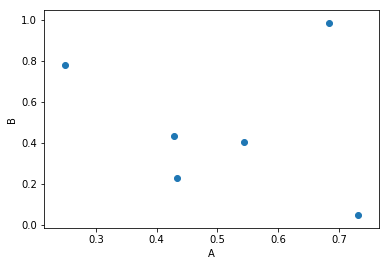

In [21]:
plt.scatter(df.A, df.C)
plt.xlabel('A')
plt.ylabel('B')
plt.show()

Можно проводить фильтрацию аналогично numpy

In [22]:
df > 0.5

,A,B,C
0,False,False,False
1,True,False,True
2,True,False,False
3,True,False,False
4,False,False,True
5,False,False,False


In [23]:
df[df > 0.5]

,A,B,C
0,NaN,NaN,NaN
1,0.684072,NaN,0.984649
2,0.731780,NaN,NaN
3,0.543992,NaN,NaN
4,NaN,NaN,0.778993
5,NaN,NaN,NaN


In [24]:
df[df.A > 0.5]

,A,B,C
1,0.684072,0.344268,0.984649
2,0.731780,0.389716,0.048951
3,0.543992,0.210241,0.407452


NaN - типичное значения для отсутствующих данных
notnull() находит не NaN значения

In [25]:
df[df > 0.5].notnull()

,A,B,C
0,False,False,False
1,True,False,True
2,True,False,False
3,True,False,False
4,False,False,True
5,False,False,False


In [26]:
df

,A,B,C
0,0.428130,0.261954,0.433151
1,0.684072,0.344268,0.984649
2,0.731780,0.389716,0.048951
3,0.543992,0.210241,0.407452
4,0.248968,0.290575,0.778993
5,0.432996,0.228263,0.231263


Поразрядные операции можно использовать в качестве логических связок

In [27]:
df[(df.A > 0.5) & (df.B < 0.4)]

,A,B,C
1,0.684072,0.344268,0.984649
2,0.731780,0.389716,0.048951
3,0.543992,0.210241,0.407452


In [28]:
df[(df.A > 0.5) | (df.B > 0.25)]

,A,B,C
0,0.428130,0.261954,0.433151
1,0.684072,0.344268,0.984649
2,0.731780,0.389716,0.048951
3,0.543992,0.210241,0.407452
4,0.248968,0.290575,0.778993


In [29]:
df[~(df.A > 0.5)]

,A,B,C
0,0.428130,0.261954,0.433151
4,0.248968,0.290575,0.778993
5,0.432996,0.228263,0.231263


Фреймы можно объединять

In [30]:
df

,A,B,C
0,0.428130,0.261954,0.433151
1,0.684072,0.344268,0.984649
2,0.731780,0.389716,0.048951
3,0.543992,0.210241,0.407452
4,0.248968,0.290575,0.778993
5,0.432996,0.228263,0.231263


In [31]:
df2 = pd.DataFrame(np.random.randint(1,10,size=6).reshape(2,3))

In [32]:
pd.concat([df,df2])

,A,B,C,0,1,2
0,0.428130,0.261954,0.433151,NaN,NaN,NaN
1,0.684072,0.344268,0.984649,NaN,NaN,NaN
2,0.731780,0.389716,0.048951,NaN,NaN,NaN
3,0.543992,0.210241,0.407452,NaN,NaN,NaN
4,0.248968,0.290575,0.778993,NaN,NaN,NaN
5,0.432996,0.228263,0.231263,NaN,NaN,NaN
0,NaN,NaN,NaN,5.0,9.0,3.0
1,NaN,NaN,NaN,5.0,9.0,9.0


In [33]:
df3 = pd.DataFrame(np.random.randint(1,10,size=6).reshape(2,3), columns=['A','B','C'])

In [34]:
pd.concat([df, df3])

,A,B,C
0,0.428130,0.261954,0.433151
1,0.684072,0.344268,0.984649
2,0.731780,0.389716,0.048951
3,0.543992,0.210241,0.407452
4,0.248968,0.290575,0.778993
5,0.432996,0.228263,0.231263
0,9.000000,2.000000,5.000000
1,2.000000,1.000000,6.000000


In [35]:
pd.concat([df, df3], axis=0, ignore_index=True)

,A,B,C
0,0.428130,0.261954,0.433151
1,0.684072,0.344268,0.984649
2,0.731780,0.389716,0.048951
3,0.543992,0.210241,0.407452
4,0.248968,0.290575,0.778993
5,0.432996,0.228263,0.231263
6,9.000000,2.000000,5.000000
7,2.000000,1.000000,6.000000


In [36]:
df4 = pd.DataFrame(np.random.randint(1,10,size=12).reshape(6,2), columns=['D', 'E'])
df4

,D,E
0,4,6
1,5,1
2,3,8
3,3,8
4,8,6
5,5,5


In [37]:
pd.concat([df, df4], axis=1) # Конкатенация по столбцам

,A,B,C,D,E
0,0.428130,0.261954,0.433151,4,6
1,0.684072,0.344268,0.984649,5,1
2,0.731780,0.389716,0.048951,3,8
3,0.543992,0.210241,0.407452,3,8
4,0.248968,0.290575,0.778993,8,6
5,0.432996,0.228263,0.231263,5,5


In [38]:
df

,A,B,C
0,0.428130,0.261954,0.433151
1,0.684072,0.344268,0.984649
2,0.731780,0.389716,0.048951
3,0.543992,0.210241,0.407452
4,0.248968,0.290575,0.778993
5,0.432996,0.228263,0.231263


Можно также добавлять новые столбцы на месте (не копируя фрейм)

In [39]:
df['Total'] = np.sum(df, axis=1) # Сумма строк

In [40]:
df

,A,B,C,Total
0,0.428130,0.261954,0.433151,1.123235
1,0.684072,0.344268,0.984649,2.012989
2,0.731780,0.389716,0.048951,1.170448
3,0.543992,0.210241,0.407452,1.161685
4,0.248968,0.290575,0.778993,1.318536
5,0.432996,0.228263,0.231263,0.892523


Иммутабельное удаление столбцов

In [41]:
df.drop(['A','B'],axis=1)

,C,Total
0,0.433151,1.123235
1,0.984649,2.012989
2,0.048951,1.170448
3,0.407452,1.161685
4,0.778993,1.318536
5,0.231263,0.892523


Мутабельное удаление

In [42]:
df.drop('Total', axis=1, inplace=True)

In [43]:
df

,A,B,C
0,0.428130,0.261954,0.433151
1,0.684072,0.344268,0.984649
2,0.731780,0.389716,0.048951
3,0.543992,0.210241,0.407452
4,0.248968,0.290575,0.778993
5,0.432996,0.228263,0.231263


Чтение csv-файлов. 
Практически все наборы данных в лабораторной представлены в виде csv-файлов с заголовками. pandas позволяет легко их читать в dataframы, при этом заголовок становится именами столбцов.

In [44]:
with open('datasets/Davis.csv') as f:
    for i, line in enumerate(f):
        print(line)
        if i > 5:
            break

"","sex","weight","height","repwt","repht"

"1","M",77,182,77,180

"2","F",58,161,51,159

"3","F",53,161,54,158

"4","M",68,177,70,175

"5","F",59,157,59,155

"6","M",76,170,76,165



In [45]:
davis = pd.read_csv('datasets/Davis.csv') # у метода много параметров, но многие наборы данных подогнаны под pandas

In [46]:
davis.sample(10) # 10 случайных строк

,Unnamed: 0,sex,weight,height,repwt,repht
142,143,F,53,165,55.0,163.0
63,64,F,78,173,75.0,169.0
117,118,M,96,184,94.0,183.0
47,48,F,49,161,NaN,NaN
37,38,M,69,174,69.0,171.0
116,117,M,83,184,83.0,181.0
21,22,F,61,170,61.0,170.0
83,84,F,60,167,55.0,163.0
62,63,M,71,180,76.0,175.0
195,196,M,74,175,71.0,175.0


Здесь затесался лишний атрибут без имени

In [47]:
davis = davis.drop("Unnamed: 0", axis=1)

In [48]:
davis.head(4) # первые 4 строки

,sex,weight,height,repwt,repht
0,M,77,182,77.0,180.0
1,F,58,161,51.0,159.0
2,F,53,161,54.0,158.0
3,M,68,177,70.0,175.0


Посмотрим, есть ли здесь NaN значения

In [49]:
davis.isna().any()

sex       False
weight    False
height    False
repwt      True
repht      True
dtype: bool

Мы можем отфильтровать весь набор данных (не делайте так если модель не использует атрибуты с отсутствующими значениями). Есть также другие стратегии работы с ними, например, вставка медианы или среднего значения на место отсутствующего.

In [50]:
davis_filtered = davis.dropna(axis=0, how='any') # удалить все строки с NaN значениями

In [51]:
davis_filtered.isna().any()

sex       False
weight    False
height    False
repwt     False
repht     False
dtype: bool

In [52]:
print(davis_filtered.shape)
print(davis.shape)

(181, 5)
(200, 5)


Составим зависимость заявленного роста от настоящего

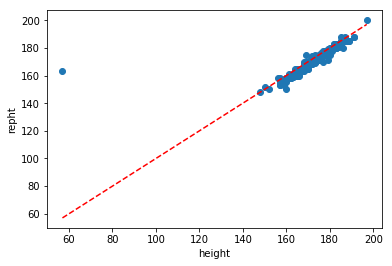

In [53]:
plt.scatter(davis_filtered.height, davis_filtered.repht)
plt.xlabel('height')
plt.ylabel('repht')
xmin, xmax = davis_filtered.height.min(), davis_filtered.height.max()
plt.plot([xmin,xmax], [xmin,xmax], color='red', linestyle='--')
plt.show()

Можно заметить, что здесь есть выброс.

In [54]:
davis_filtered.loc[:,['height', 'repht']][davis_filtered.height < 80]

,height,repht
11,57,163.0


Вероятная причина - дюймовая система

In [55]:
57 * 2.54

144.78

Не похоже... 5 футов, семь дюймов?

In [56]:
5 * 2.54 * 12 + 2.54 * 7

170.17999999999998

Тоже, не очень... Выкинем, чтобы не портило картину

In [57]:
davis_filtered = davis_filtered[davis_filtered.height > 120]

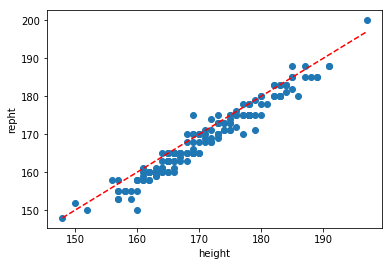

In [58]:
plt.scatter(davis_filtered.height, davis_filtered.repht)
plt.xlabel('height')
plt.ylabel('repht')
xmin, xmax = davis_filtered.height.min(), davis_filtered.height.max()
plt.plot([xmin,xmax], [xmin,xmax], color='red', linestyle='--')
plt.show()

Можно заметить, что в большинстве случае люди указывают больший рост, чем замеряется

In [59]:
np.median(davis_filtered.repht - davis_filtered.height)

-2.0

Один из вариантов фильтрации выбросов - по квантилям. Квантиль для вероятности p - это значение, которое случайная величина не будет превышать с вероятностью p.  Например, с вероятность 0.05 вес меньше 50, и с вероятностью 0.95 вес меньше 90. Таким образом мы можем вытащить 90% посередине (в нашем случае - по росту)

In [60]:
davis_filtered.quantile([.05,.95]) 

,weight,height,repwt,repht
0.05,50.0,157.95,48.9,155.0
0.95,90.0,185.05,91.1,185.0


In [61]:
davis_filtered.height.quantile([.05,.95])

0.05    157.95
0.95    185.05
Name: height, dtype: float64

In [62]:
a, b = davis_filtered.height.quantile([.05,.95])
filter_height = davis_filtered[(davis_filtered.height > a) & (davis_filtered.height < b)]
print(filter_height.shape)

(162, 5)


### Дополнительно

In [63]:
print(davis.columns) # коллекция из имен столбцов
print(davis.index) # коллекция из индексов
print(davis.values[::10]) # преобразовать в numpy массив и вывести каждую 10 строку

Index(['sex', 'weight', 'height', 'repwt', 'repht'], dtype='object')
RangeIndex(start=0, stop=200, step=1)
[['M' 77 182 77.0 180.0]
 ['M' 70 175 75.0 174.0]
 ['M' 119 180 124.0 178.0]
 ['F' 71 166 71.0 165.0]
 ['F' 54 164 53.0 160.0]
 ['M' 82 182 85.0 183.0]
 ['M' 68 165 69.0 165.0]
 ['F' 62 175 61.0 171.0]
 ['F' 61 165 60.0 163.0]
 ['M' 70 173 68.0 170.0]
 ['F' 55 164 55.0 163.0]
 ['M' 84 183 90.0 183.0]
 ['M' 78 178 77.0 175.0]
 ['F' 62 166 61.0 163.0]
 ['M' 66 175 68.0 175.0]
 ['F' 57 168 58.0 165.0]
 ['F' 51 163 50.0 160.0]
 ['M' 76 169 75.0 165.0]
 ['M' 80 176 78.0 175.0]
 ['M' 88 185 93.0 188.0]]


### Категориальные атрибуты
Категориальные атрибуты имеют ограниченную область значений, состоящую из качественных категорий. Во многих случаях, между категориями нельзя задать отношение порядка (пол, раса), но если это возможно (оценка, отзыв плохо-средне-хорошо) то такая переменная называется <b>ординальной</b>.

Категориальные переменные требуют кодировки, чтобы использоваться в обучаемых моделях, работающих с числами. Сгенерируем набор данных из трех категорий для примера.

In [64]:
mid_income = np.random.normal(loc=1000, scale=300, size=10)
high_income = np.random.normal(loc=1400, scale=500, size=10)
phd_income = np.random.normal(loc=1450, scale=600, size=10)
education = ['mid_school'] * 10 + ['university'] * 10 + ['PhD'] * 10
edu_frame = pd.DataFrame(data={'education': education, 
                               'income': np.concatenate((mid_income, high_income, phd_income))})

In [65]:
edu_frame

,education,income
0,mid_school,809.278872
1,mid_school,642.014548
2,mid_school,775.051476
3,mid_school,286.315055
4,mid_school,1011.991458
5,mid_school,811.729674
6,mid_school,1024.651099
7,mid_school,926.872076
8,mid_school,1397.907204
9,mid_school,923.099664


Данная переменная не может с уверенностью считаться ординальной.

In [66]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

Один вариант - закодировать переменную числами от 0 до N-1, где N - число категорий

In [67]:
label_encoder = LabelEncoder()

In [68]:
labels = label_encoder.fit_transform(edu_frame.education)

In [69]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

В принципе, нам должно быть наплевать, какое число из $[0,N)$ назначается какой категории. В данном случае категориям назначаются числа в лексикографическом порядке их названий. Но для иллюстрации, назначим их руками.

In [70]:
label_encoder = LabelEncoder()
label_encoder.classes_ = ['mid_school', 'university', 'PhD']
labels = label_encoder.transform(edu_frame.education)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [71]:
edu_frame['edu_label'] = labels

In [72]:
edu_frame.sample(8)

,education,income,edu_label
11,university,940.449948,1
23,PhD,1275.503955,2
16,university,1683.592206,1
26,PhD,1694.109444,2
18,university,1313.326138,1
8,mid_school,1397.907204,0
27,PhD,1749.680338,2
19,university,1010.023345,1


Однако если мы отправим edu_label в модель, например в линейную, то с точки зрения модели mid_school < university < PhD, что может быть разумным в некоторых контекстах, и неразумным в других. Не говоря о том, что даже если порядок присутствует, PhD не обязательно на столько больше university, как 2 > 1.

Другой вариант - ввести несколько бинарных признаков, по одному на категорию.

Такой подход называется one-hot кодировкой (одноместной), потому что для любого экземпляра данных только один из атрибутов будет равен единице.

In [73]:
oh = OneHotEncoder(sparse=False)
oh_enc = oh.fit_transform(labels.reshape(-1,1))
print(oh_enc[::5]) # выводим каждую 5 строку

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


/home/ivan/.pyenv/versions/3.6.4/envs/general36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Вместо LabelEncoder и One Hot Encoder можно также использовать метод get_dummies из pandas (хотя дальше мы продолжим использовать oh_enc). Преимущество - автоматическое назначение номеров категориям, автоматическое именование столбцов получаемого фрейма.

In [74]:
D = pd.get_dummies(edu_frame.education)
D.sample(5)

,PhD,mid_school,university
1,0,1,0
27,1,0,0
28,1,0,0
4,0,1,0
18,0,0,1


Теперь мы можем натренировать модель вида $income = a * mid\_school +  b * university + c * PhD +  d$

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
X = pd.DataFrame(data=oh_enc,columns=label_encoder.classes_, dtype=np.int32)
X.iloc[::5]

,mid_school,university,PhD
0,1,0,0
5,1,0,0
10,0,1,0
15,0,1,0
20,0,0,1
25,0,0,1


In [77]:
linreg = LinearRegression()

In [78]:
linreg.fit(X, edu_frame.income)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [79]:
print(linreg.coef_)
print(X.columns)

[-359.97663228  169.05257122  190.92406106]
Index(['mid_school', 'university', 'PhD'], dtype='object')


In [80]:
linreg.intercept_

1220.867744814754

In [81]:
linreg.score(X,edu_frame.income)

0.47229265383814434

Что не так с этой моделью

In [82]:
w = linreg.coef_
b = linreg.intercept_ 

xx = np.diag([1,1,1])
print(xx)
print('w =',w,'b =',b)
print(np.dot(xx, w) + b) #Вычисляем линейную функцию на всех возможных входах
b -= 500 #Убавляем из b 500
print('w =',w + 500,'b =',b) #Прибавляем к каждому весу 500
print(np.dot(xx, w + 500) + b) #и получаем те же результаты

[[1 0 0]
 [0 1 0]
 [0 0 1]]
w = [-359.97663228  169.05257122  190.92406106] b = 1220.867744814754
[ 860.89111253 1389.92031604 1411.79180588]
w = [140.02336772 669.05257122 690.92406106] b = 720.8677448147539
[ 860.89111253 1389.92031604 1411.79180588]


 поскольку в формуле $income = a * mid\_school +  b * university + c * PhD + d*1$ атрибуты суммируются в единицу, т.е. $mid\_school + university + PhD = 1$, по сути ищется оптимальная линейная функция вида:
 
 \begin{equation*}
 income = a * mid\_school +  b * university + c * PhD + d*(mid\_school + university + PhD)
 \end{equation*}
 
 Или
  \begin{equation*}
 income = (a + d) * mid\_school +  (b + d) * university + (c + d) * PhD
 \end{equation*}
 
Очевидно, что их бесконечное множество. В данном случае одно из решений было найдено, но во многих других библотеках происходят ошибки из-за вырожденности матрицы $X$ (если добавить в нее столбец из единиц).

Чтобы избежать этой проблемы и получить интерпретируемое решение, нужно выделить $n-1$ переменных из $n$ категорий, т.е. выбросить одну из новых переменных. 

In [83]:
linreg2 = LinearRegression()
Xreduced = X.iloc[:,1:] # все столбцы кроме первого (mid_school)
linreg2.fit(Xreduced, edu_frame.income)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [84]:
print(linreg2.coef_)
print(Xreduced.columns)
linreg2.intercept_

[529.02920351 550.90069335]
Index(['university', 'PhD'], dtype='object')


860.8911125303554

In [85]:
linreg2.score(Xreduced,edu_frame.income)

0.47229265383814434

Теперь модель имеет вид $income = a * university + b * PhD + d*1$.
У нее следующая интерпретация:

Если education=mid\_school, то $income=d$ <br> 
Если education=university, то $income = a + d$ <br>
Если education=PhD, то $income = b + d$ <br>

В этом смысле, $mid\_school$ - это случай по умолчанию и модель показывает прирост/падение в зависимости от другого уровня образования. Подход расширяется на множество категориальных переменных, а также на смешанные атрибуты. 

Кодировка из $n-1$ категорий называется dummy-кодировкой (но .get_dummies мы использовали чтобы получить one-hot). В случае двух категорий одной назначается 1, другой 0.

Получить dummy кодировку без страданий также можно через pandas через опцию drop_first функции pd.get_dummies

In [86]:
pd.get_dummies(edu_frame.education, drop_first=1).iloc[::5]

,mid_school,university
0,1,0
5,1,0
10,0,1
15,0,1
20,0,0
25,0,0


Попробуем интерпретировать переменную education как ординальную. Две основные стратегии - игнорировать порядок, как мы это сделали выше или попробовать назначить им числовые метки

In [87]:
lenc2 = LabelEncoder()

In [88]:
lenc2.classes_ = ['mid_school', 'university', 'PhD']

In [89]:
lenc2.classes_

['mid_school', 'university', 'PhD']

In [90]:
edu_labels = lenc2.transform(edu_frame.education)
print(edu_labels)

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]


Производительность линейной модели заметно падает, поскольку мы назначаем переменным числа без какого-либо основания.

In [91]:
linreg3 = LinearRegression()
linreg3.fit(edu_labels.reshape(-1,1),edu_frame.income)
linreg3.score(edu_labels.reshape(-1,1),edu_frame.income)

0.36825943042077336

Один редкий способ дать модели информацию о порядке - rank-hot кодировка. (http://scottclowe.com/2016-03-05-rank-hot-encoder/) <br>
В таком случае:<br>
mid_school = \[1,0,0\]<br>
university = \[1,1,0\]<br>
phd = \[1,1,1\]
Интепретировать эти признаки можно через словосочетание "как минимум". Человек, окончивший университет, как минимум окончил школу.


Построим rank-hot из имеющейся one-hot кодировки

In [92]:
rX = oh_enc.copy()

In [93]:
print(rX[::6])

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


Поставим в первом (от нуля) столбце единицы там, где они есть во втором

In [94]:
rX[:,1][rX[:,2] == 1] = 1 

Вместо наполнения нулевого столбца, просто его выбросим, ибо в rank-hot кодировке он везде равен единице

In [95]:
rX = rX[:,1:] 
print(rX[::5])

[[0. 0.]
 [0. 0.]
 [1. 0.]
 [1. 0.]
 [1. 1.]
 [1. 1.]]


In [96]:
linreg4 = LinearRegression()
linreg4.fit(rX,edu_frame.income)
linreg4.score(rX,edu_frame.income)

0.47229265383814434

мы получили производительность, идентичную dummy-кодировке

In [97]:
print(linreg4.coef_)
print(lenc2.classes_[1:])
linreg4.intercept_

[529.02920351  21.87148984]
['university', 'PhD']


860.8911125303555

Интерпретация:

$income = income_0 + a * university + b * phd$

$income_0$ - доход при среднем образовании<br>
$a$ - прибавка за университет при имеющемся среднем<br>
$b$ - прибавка за кандидата при имеющемся среднем и высшем.


### Резюме
Pandas позволяет удобно работать с табличными данными, анализировать и фильтровать их.

Многие наборы данных на таких сайтах, как Kaggle, представлены в нативном для Pandas csv-формате.

Категориальные переменные требуют дополнительной обработки в отличие от количественных. Распространенные форматы - One Hot и Dummy кодировки. Ординальные переменные могут обрабатываться как категориальные, но при этом модель не получает информацию о порядке
